In [1]:
# Import data manipulation package
import json, glob
import pandas as pd
import numpy as np

## Import data visualization packages

import seaborn as sns # Import seaborn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline

#Set Thai font
font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')

In [2]:
# Aggregrate Scraping Data
data_list = []
for file_name in glob.iglob('raw-data/by_latlng/*.json', recursive=True):
    with open (file_name, "r") as f: data = json.loads(f.read())
    data_list+=data

for file_name in glob.iglob('raw-data/by_province_name/*.json', recursive=True):
    with open (file_name, "r") as f: data = json.loads(f.read())
    data_list+=data
    
df = pd.DataFrame(data_list)
df = df.drop_duplicates(subset=['id'], keep='first')
selected_province_list = ["กรุงเทพมหานคร", "สมุทรปราการ", "นนทบุรี", "ปทุมธานี", "นครปฐม", "สมุทรสงคราม"]
df = df[df.province.isin(selected_province_list)]
df.to_csv("seven_data.csv", index=False)

In [135]:
file = "seven_data.csv"
df = pd.read_csv(file)
df.province.unique()
df.head()

id        lat         lng   code                            name  \
0  16073  13.801410  100.183792  16073            แยกท่านา (นครชัยศรี)   
1  15121  13.807352  100.160487  15121  ตลาดท่องเที่ยวศรีษะทอง(นครปฐม)   
2  10840  13.801055  100.165850  10840                   ปตท.ท่าตำหนัก   
3  14543  13.797550  100.174890  14543               ท่านา (นครชัยศรี)   
4   6288  13.898010  100.675338   6288                      จตุโชติ 12   

                                        address subdistrict   district  \
0                ต.บางกระเบา อ.นครชัยศรี นครปฐม   บางกระเบา  นครชัยศรี   
1                 ต.ศรีษะทอง อ.นครชัยศรี นครปฐม    ศรีษะทอง  นครชัยศรี   
2                  ต.บางแก้ว อ.นครชัยศรี นครปฐม     บางแก้ว  นครชัยศรี   
3                ต.ท่าตำหนัก อ.นครชัยศรี นครปฐม   ท่าตำหนัก  นครชัยศรี   
4  ถ.จตุโชติ แขวงออเงิน เขตสายไหม กรุงเทพมหานคร      ออเงิน     สายไหม   

        province  postcode                                           products  \
0         นครปฐม     73120  [{'id': 13, 'code': 'VF', 'name': 'ผักและผลไม้...   
1         นครปฐม     73120  [{'id': 6, 'code': 'AC', 'name': 'ออลล์คาเฟ่',...   
2         นครปฐม     73120  [{'id': 13, 'code': 'VF', 'name': 'ผักและผลไม้...   
3         นครปฐม     73120  [{'id': 15, 'code': 'FM', 'name': 'เนื้อสัตว์แ...   
4  กรุงเทพมหานคร     10220  [{'id': 15, 'code': 'FM', 'name': 'เนื้อสัตว์แ...   

            tel     distance  renovate  \
0  091-001-6073  1693.380123     False   
1  091-001-5121  1734.692821     False   
2  091-001-0840  1747.824889     False   
3  091-001-4543  1831.236837     False   
4  091-002-6288   424.474660     False   

                                           direction  
0  https://www.google.com/maps/search/?api=1&quer...  
1  https://www.google.com/maps/search/?api=1&quer...  
2  https://www.google.com/maps/search/?api=1&quer...  
3  https://www.google.com/maps/search/?api=1&quer...  
4  https://www.google.com/maps/search/?api=1&quer...

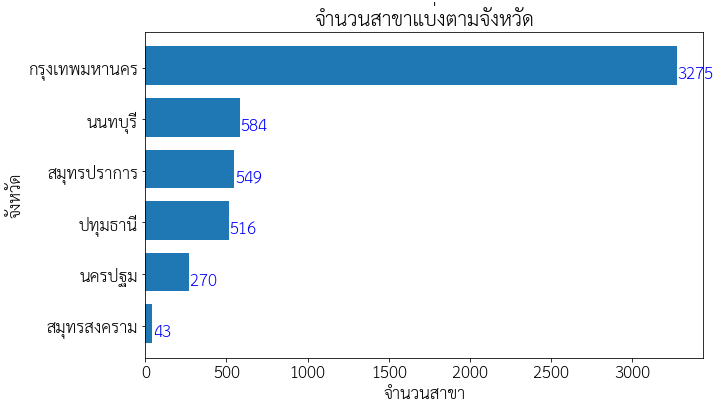

In [42]:
cnt_store_by_provice = df.groupby("province").count()['id'].reset_index().sort_values(by='id', ascending=False)
fig, ax = plt.subplots()
x = cnt_store_by_provice['province'].values
y = cnt_store_by_provice['id'].values
ind = np.arange(len(y))
width = 0.75 # the width of the bars 
ax.barh(ind, y, width)
ax.set_yticks(ind)
ax.set_yticklabels(x)
ax.set_yticks(ind+width/20)
ax.set_yticklabels(x, minor=False)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('จำนวนสาขา')
ax.set_ylabel('จังหวัด')
ax.set_title('จำนวนสาขาแบ่งตามจังหวัด')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
font = {'family': 'TH Sarabun Chula', 'weight': 'bold', 'size': 25}
matplotlib.rc('font', **font)
matplotlib.rc('figure', figsize=(10,5))
plt.savefig('cnt_store_by_provice.png')
plt.show()

In [32]:
products =[]
for d in data_list:
    p = d['products']
    for item in p:
        item.update( {"store_id":d['id']})
    products+=p
products_x_store = pd.DataFrame(products)
products_x_store.head(2)

id code           name                                              image  \
0  13   VF  ผักและผลไม้สด    /static/imgs/components/google-map/icons/vf.svg   
1   6   AC     ออลล์คาเฟ่  /static/imgs/components/google-map/icons/ic_7-...   

                                                logo store_id  
0    /static/imgs/components/google-map/logos/vf.svg    16073  
1  /static/imgs/components/google-map/logos/ic_7-...    15121

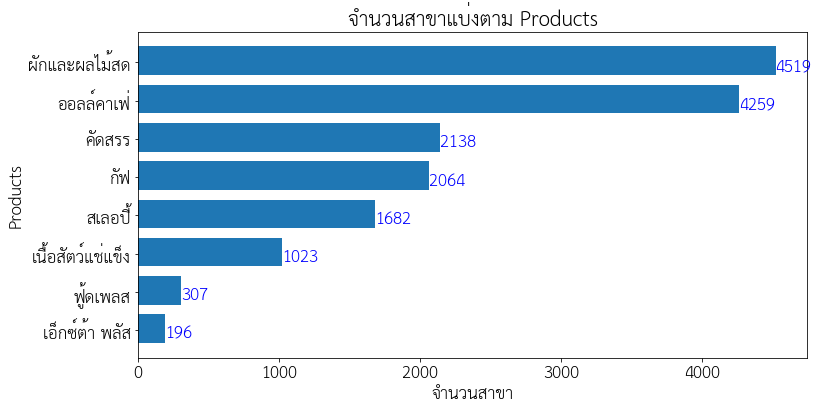

In [35]:
cnt_store_product = products_x_store.groupby("name").agg({"store_id": "nunique"}).reset_index().sort_values(by='store_id', ascending=False)
fig, ax = plt.subplots()
y = cnt_store_product['store_id'].values
x =cnt_store_product['name'].values
ind = np.arange(len(y))
width = 0.75 # the width of the bars 
ax.barh(ind, y, width)
ax.set_yticks(ind)
ax.set_yticklabels(x)
ax.set_yticks(ind+width/20)
ax.set_yticklabels(x, minor=False)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('จำนวนสาขา')
ax.set_ylabel('Products')
ax.set_title('จำนวนสาขาแบ่งตาม Products')
for i, v in enumerate(y):
    ax.text(v, i + .25, str(v), color='blue', fontweight='bold')
font = {'family': 'TH Sarabun Chula', 'weight': 'bold', 'size': 25}
matplotlib.rc('font', **font)
matplotlib.rc('figure', figsize=(12,6))
plt.savefig('cnt_store_product.png')
plt.show()

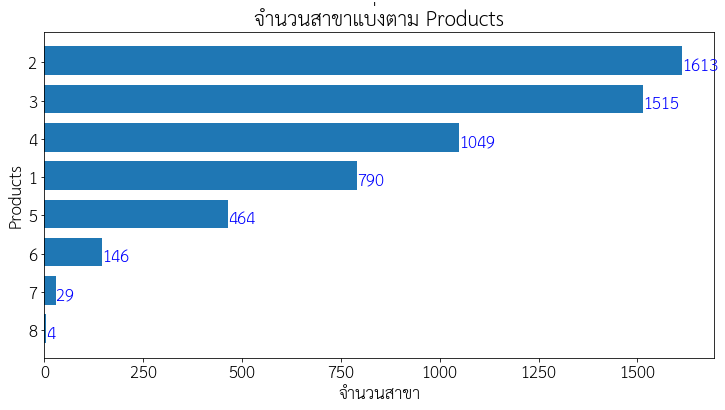

In [36]:
products_per_store = products_x_store.groupby("store_id").agg({"id": "nunique"}).reset_index()
cnt_products_per_store = products_per_store.groupby("id").count().reset_index().sort_values(by='store_id', ascending=False)
cnt_products_per_store.columns =['num_products', 'cnt_store']
fig, ax = plt.subplots()
y = cnt_products_per_store['cnt_store'].values
x =cnt_products_per_store['num_products'].values
ind = np.arange(len(y))
width = 0.75 # the width of the bars 
ax.barh(ind, y, width)
ax.set_yticks(ind)
ax.set_yticklabels(x)
ax.set_yticks(ind+width/20)
ax.set_yticklabels(x, minor=False)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('จำนวนสาขา')
ax.set_ylabel('Products')
ax.set_title('จำนวนสาขาแบ่งตาม Products')
for i, v in enumerate(y):
    ax.text(v+.25, i + .25, str(v), color='blue', fontweight='bold')
plt.savefig('cnt_store_product.png')
plt.show()

In [37]:
df_store_x_products = products_x_store.pivot_table(index=["store_id"], 
                    columns='name', 
                    values='id').fillna(False).replace(products_x_store.id.unique(), True)
df_store_x_products.head()

name       กัฟ  คัดสรร  ผักและผลไม้สด  ฟู้ดเพลส  สเลอปี้  ออลล์คาเฟ่  \
store_id                                                               
00005     True   False          False     False     True        True   
00006     True   False          False     False     True       False   
00007     True   False          False     False     True        True   
00010     True    True           True     False     True        True   
00012     True    True           True     False     True        True   

name      เนื้อสัตว์แช่แข็ง  เอ็กซ์ต้า พลัส  
store_id                                     
00005                 False           False  
00006                 False           False  
00007                 False           False  
00010                 False           False  
00012                 False           False

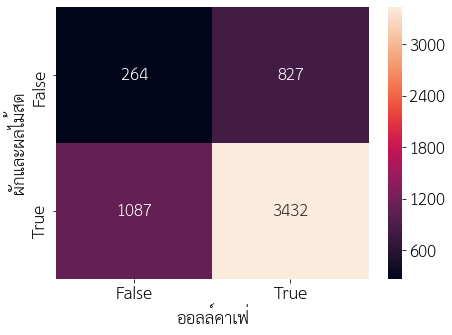

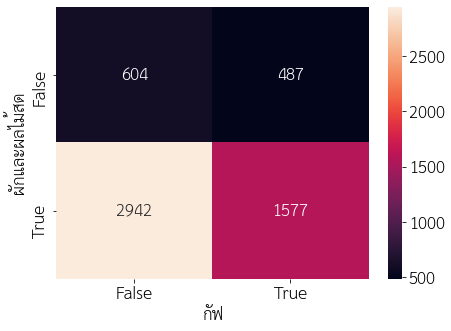

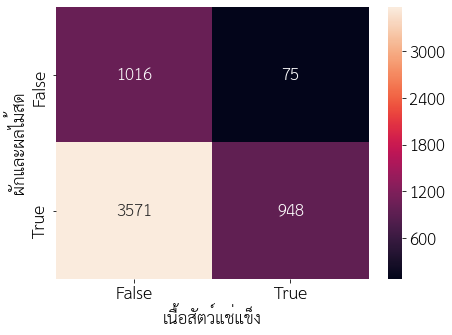

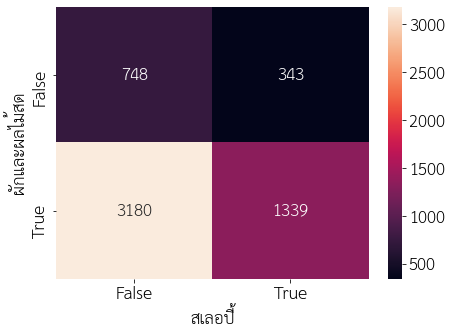

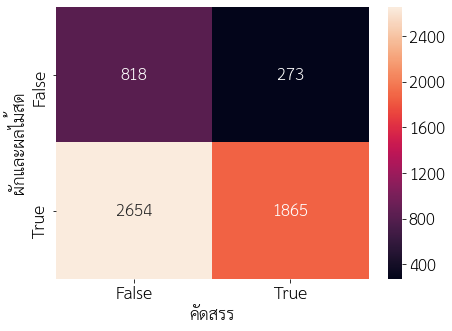

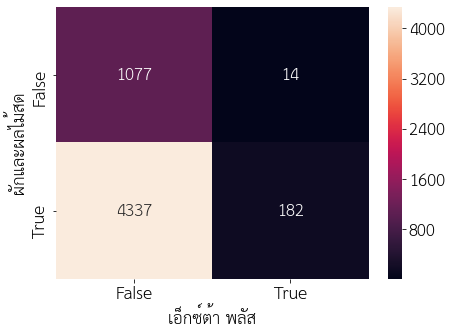

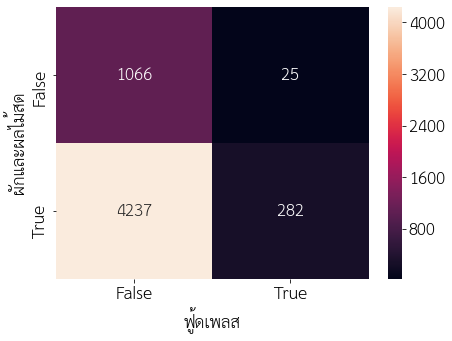

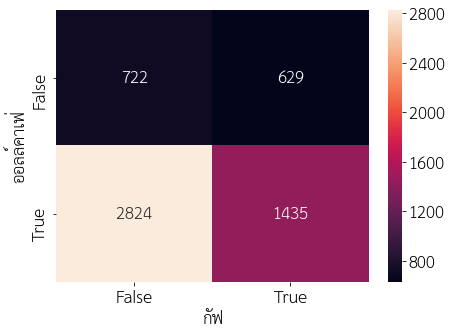

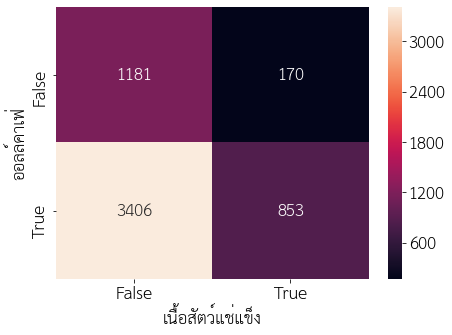

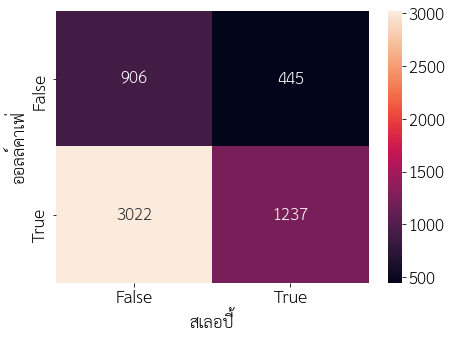

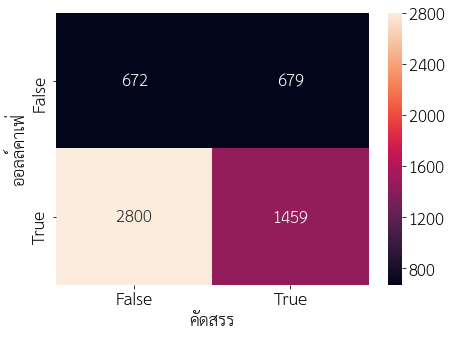

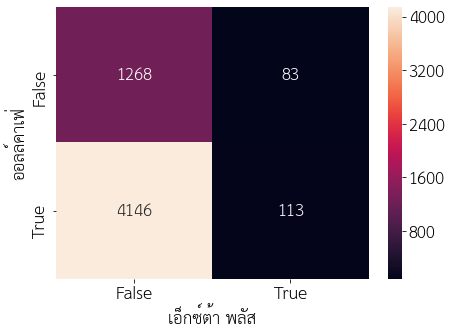

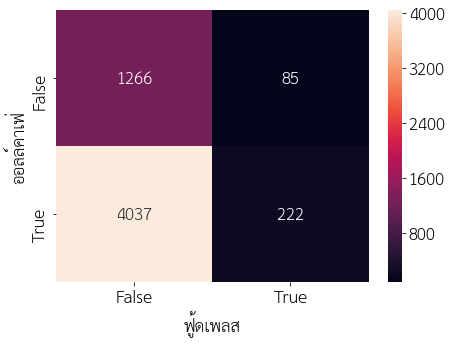

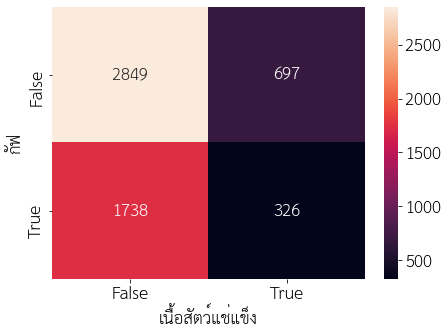

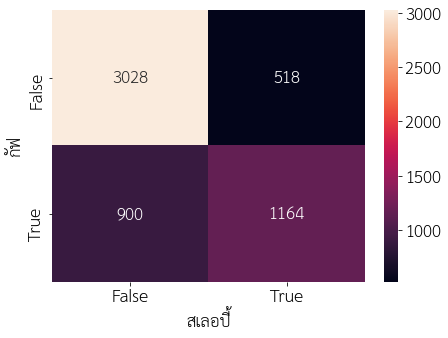

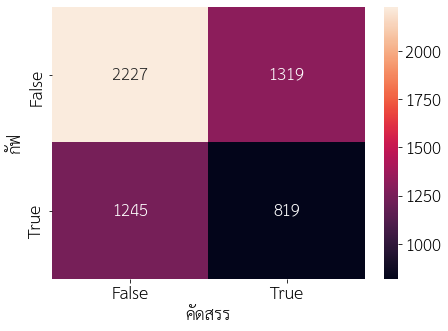

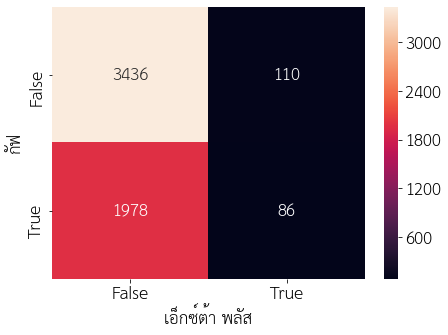

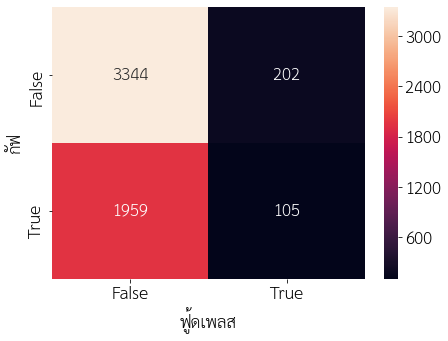

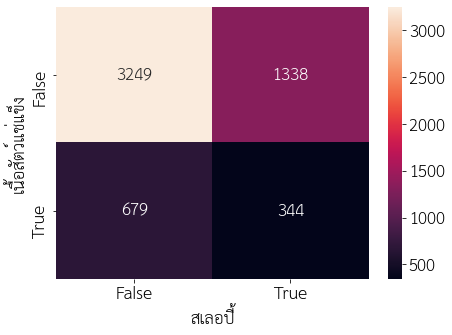

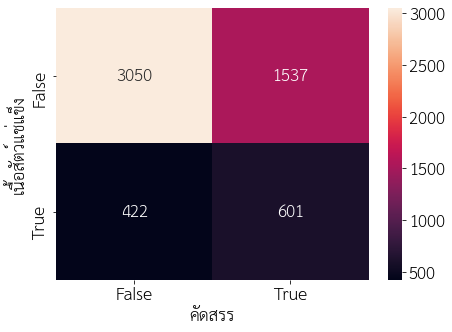

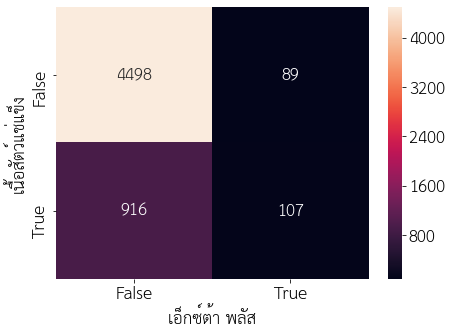

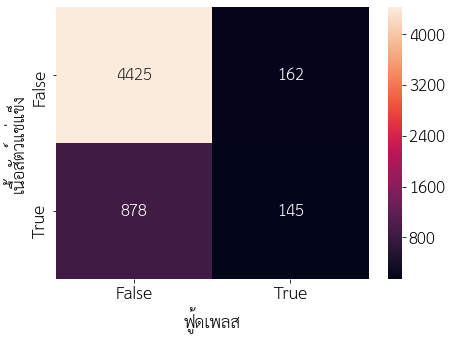

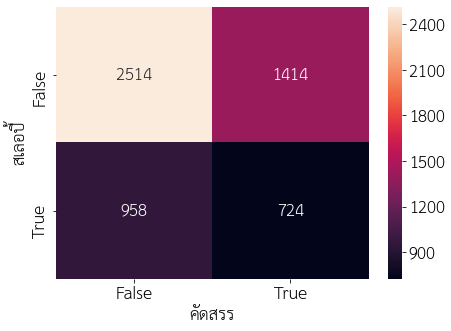

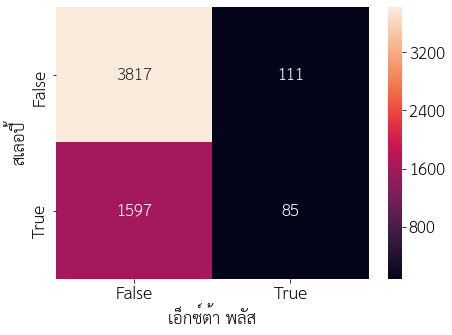

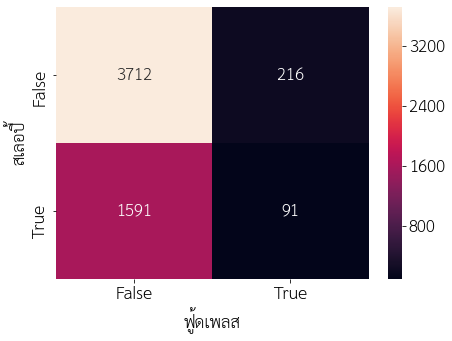

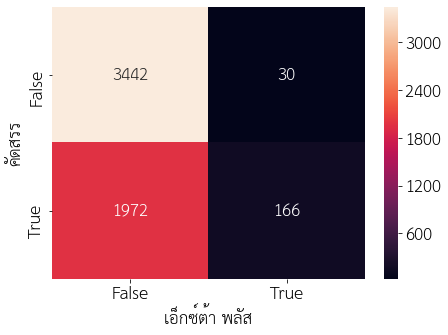

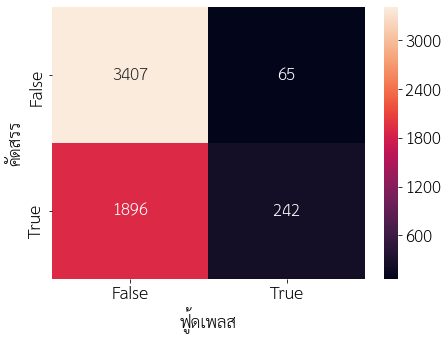

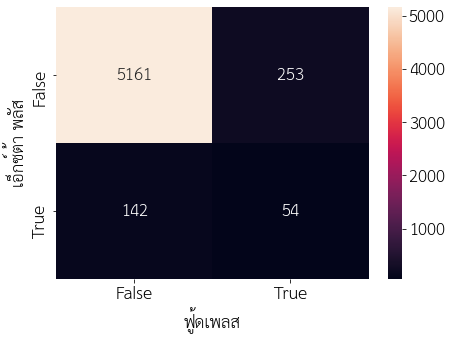

In [38]:
from itertools import combinations
products_list = products_x_store.name.unique()
combi = list(combinations(products_list, 2))
crosstab_list = []
for comb in combi:
    ct = pd.crosstab(index=df_store_x_products[comb[0]],columns=df_store_x_products[comb[1]])
    crosstab_list.append({
        "combination": f"{comb[0]}_{comb[1]}",
        "count":ct[1][1]
    })
    matplotlib.rc('figure', figsize=(7,5))
    sns.heatmap(ct, annot = True, fmt="d")
    plt.savefig(f'cnt_products_combination_{comb[0]}_{comb[1]}.png')
    plt.show()

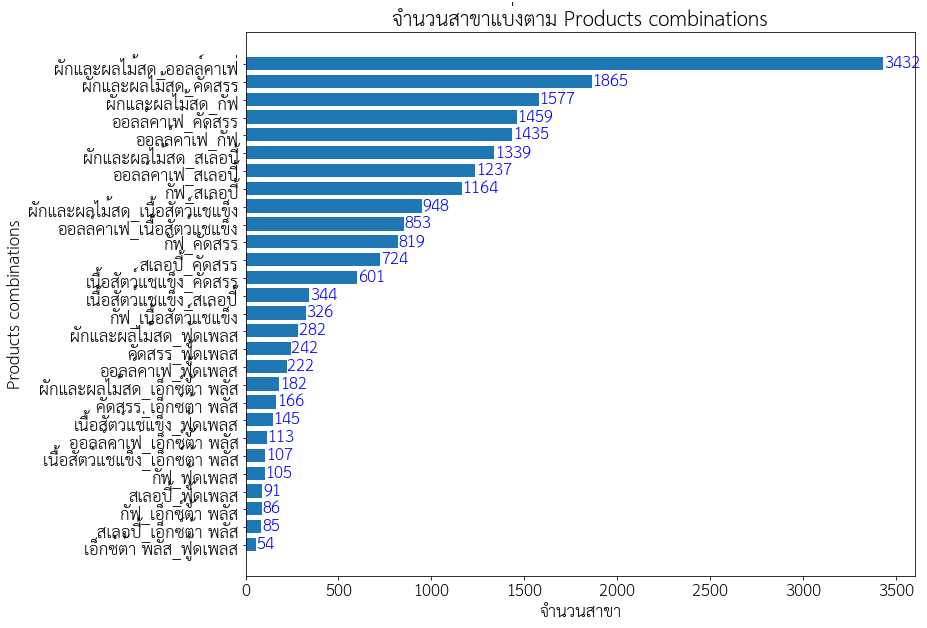

In [49]:
df_products_combination = pd.DataFrame(crosstab_list).sort_values(by='count', ascending=False)
fig, ax = plt.subplots()
matplotlib.rc('figure', figsize=(15,10))
y = df_products_combination['count'].values
x = df_products_combination['combination'].values
ind = np.arange(len(y))
width = 0.75 # the width of the bars 
ax.barh(ind, y, width)
ax.set_yticks(ind)
ax.set_yticklabels(x)
ax.set_yticks(ind+width/20)
ax.set_yticklabels(x, minor=False)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('จำนวนสาขา')
ax.set_ylabel('Products combinations')
ax.set_title('จำนวนสาขาแบ่งตาม Products combinations')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
matplotlib.rc('figure', figsize=(12,15))
plt.savefig('cnt_store_product.png')
plt.show()

In [64]:
import folium

In [125]:
thai_geojson = "thailandWithName.json"


m = folium.Map(
    location=[13.752902,100.496298],
    zoom_start=6,
)

# folium.GeoJson(thai_geojson, name="geojson").add_to(m)
folium.LayerControl().add_to(m)

In [146]:
#create map
map = folium.Map(location=[13.7278956,100.52412349999997],zoom_start=11)
fg = folium.FeatureGroup(name='7-11 Store Map')

#create marker on the map by lat & long, with pop-up as office name
for i in range(df.shape[0]):
    lat = df.loc[i,'lat']
    long = df.loc[i,'lng']
    popup = df.loc[i,'name']
    fg.add_child(folium.CircleMarker(location=[lat,long], popup = popup
                                  ,radius = 2, fill=True, color='green'))
map.add_child(fg)
map.save('7eleven_Map.html')
map

In [141]:
df.shape[0]

5237